<a href="https://colab.research.google.com/github/Lazar-Wolfe/AI-for-Eco-AI60003-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U numpy==1.19.2 > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Activation

In [ ]:
print(f"pandas=={pd.__version__}")
print(f"numpy=={np.__version__}")
print(f"sklearn=={sklearn.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")

pandas==1.3.5
numpy==1.21.6
sklearn==1.0.2
tensorflow==2.9.2
keras==2.9.0


In [ ]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

In [ ]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [ ]:
BATCH_SIZE = 64

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/30
42/42 [==============================] - 22s 132ms/step - loss: 0.0011 - val_loss: 0.0119
Epoch 2/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 3/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0126 - val_loss: 0.0033
Epoch 4/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 5/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0120 - val_loss: 0.0276
Epoch 6/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 7/30
42/42 [==============================] - 2s 45ms/step - loss: 0.0103 - val_loss: 0.0079
Epoch 8/30
42/42 [==============================] - 2s 53ms/step - loss: 0.0031 - val_loss: 0.0339
Epoch 9/30
42/42 [==============================] - 2s 52ms/step - loss: 0.0017 - val_loss: 0.0125
Epoch 10/30
42/42 [==============================] - 4s 86ms/step - loss: 0.0117 - val_loss: 0.0504
Epoch 1

In [ ]:
y_hat = model.predict(X_test)

5/5 [==============================] - 4s 27ms/step


In [ ]:
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 31ms/step - loss: 5.5987e-04


0.0005598710849881172

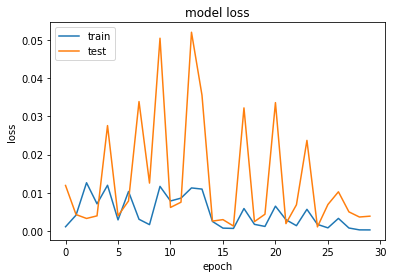

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 22ms/step


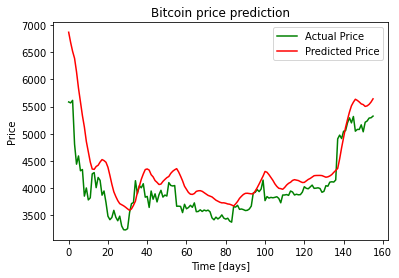

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();